In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection

In [7]:
raw_data = pd.read_csv("data/final_timeseries.csv", index_col=0, parse_dates=True).squeeze()
gen_data = pd.read_csv("results/gnrtd_timeseries.csv", index_col=0, parse_dates=True).squeeze()

raw_data.index.name = None
df = pd.DataFrame({'Real': raw_data.values, 'Generated': gen_data.values}, index=raw_data.index)
df

,Real,Generated
1969-12-31 17:00:00,-0.947297,0.687755
1969-12-31 18:00:00,-0.907356,0.536791
1969-12-31 19:00:00,-1.189550,0.096500
1969-12-31 20:00:00,-1.499150,-0.264249
1969-12-31 21:00:00,-1.587437,-0.326147
...,...,...
2020-12-31 12:00:00,-1.197694,-0.777468
2020-12-31 13:00:00,-1.078706,-0.627059
2020-12-31 14:00:00,-0.936433,-0.508560
2020-12-31 15:00:00,-0.914538,-0.510630


## Descriptive Plots

Plot seasonal and diurnal profiles along with autocorrelation.

In [8]:
def autocorrelation(x):
    slope = np.polyfit(x[:-1], x[1:], 1)[0]
    return slope

In [9]:
hourly_correlation_real = autocorrelation(df.Real)
daily_correlation_real = autocorrelation(df.Real.resample('D').mean())
monthly_correlation_real = autocorrelation(df.Real.resample('MS').mean())

hourly_correlation_gen = autocorrelation(df.Generated)
daily_correlation_gen = autocorrelation(df.Generated.resample('D').mean())
monthly_correlation_gen = autocorrelation(df.Generated.resample('MS').mean())

data = {
    'Hourly': [hourly_correlation_real, hourly_correlation_gen],
    'Daily': [daily_correlation_real, daily_correlation_gen],
    'Monthly': [monthly_correlation_real, monthly_correlation_gen]
}
corr_df = pd.DataFrame(data=data, index=['Real', 'Generated']).T
corr_df

,Real,Generated
Hourly,0.985122,0.959755
Daily,0.981910,0.790868
Monthly,0.841045,0.036886


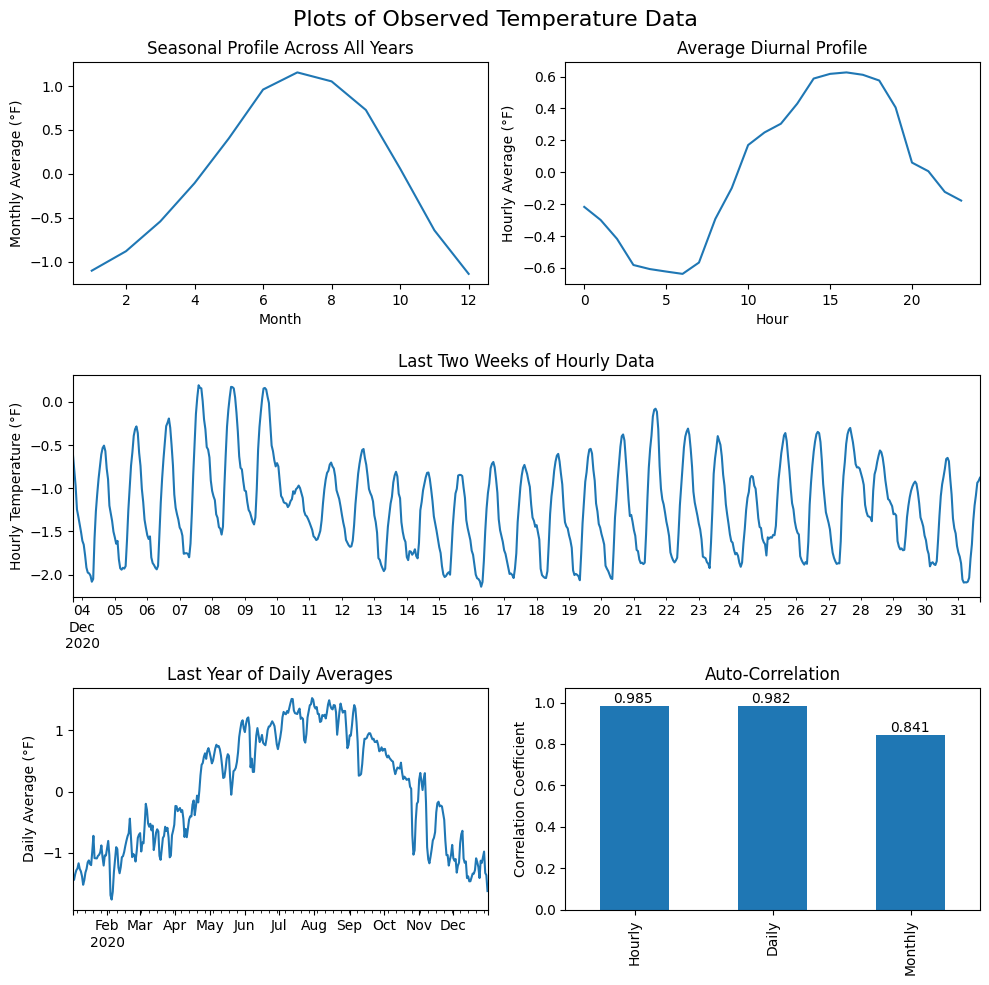

In [10]:
# Create a GridSpec with 3 rows and 2 columns

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3, 2)

# Top row: 2 plots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Middle row: 1 wide plot spanning both columns
ax3 = fig.add_subplot(gs[1, :])

# Bottom row: 2 plots
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Plot seasonal profile
df.iloc[:,0].groupby(df.index.month).mean().plot(ax=ax1)
ax1.set_title('Seasonal Profile Across All Years')
ax1.set_ylabel('Monthly Average (°F)')
ax1.set_xlabel('Month')

# Plot diurnal profile
df.iloc[:,0].groupby(df.index.hour).mean().plot(ax=ax2)
ax2.set_title('Average Diurnal Profile')
ax2.set_ylabel('Hourly Average (°F)')
ax2.set_xlabel('Hour')

# Plot last two weeks of hourly data
df.iloc[-24*28:, 0].plot(ax=ax3, title='Last Two Weeks of Hourly Data')
# set y-axis label
ax3.set_ylabel('Hourly Temperature (°F)')

# Plot the last year of daily averages
df.resample('D').mean().iloc[-365:, 0].plot(ax=ax4, title='Last Year of Daily Averages')
# set y-axis label
ax4.set_ylabel('Daily Average (°F)')

# Plot correlation
# ax5.bar(corr_df.index, corr_df)
corr_df.iloc[:,0].plot(kind='bar', ax=ax5)
# set y-axis label
ax5.set_ylabel('Correlation Coefficient')
ax5.set_title('Auto-Correlation')
for i, value in enumerate(corr_df['Real']):
    ax5.text(i-0.01, value, f'{value:.3f}', ha='center', va='bottom')
# for i, value in enumerate(corr_df['Generated']):
#     ax5.text(i+0.01, value, f'{value:.3f}', ha='left', va='bottom')

plt.ylim(bottom=0, top=1.07)

# add title to entire figure
fig.suptitle('Plots of Observed Temperature Data', fontsize=16)

plt.tight_layout()
plt.savefig('results/seasonal_diurnal_correlation.png', dpi=300)
plt.show()


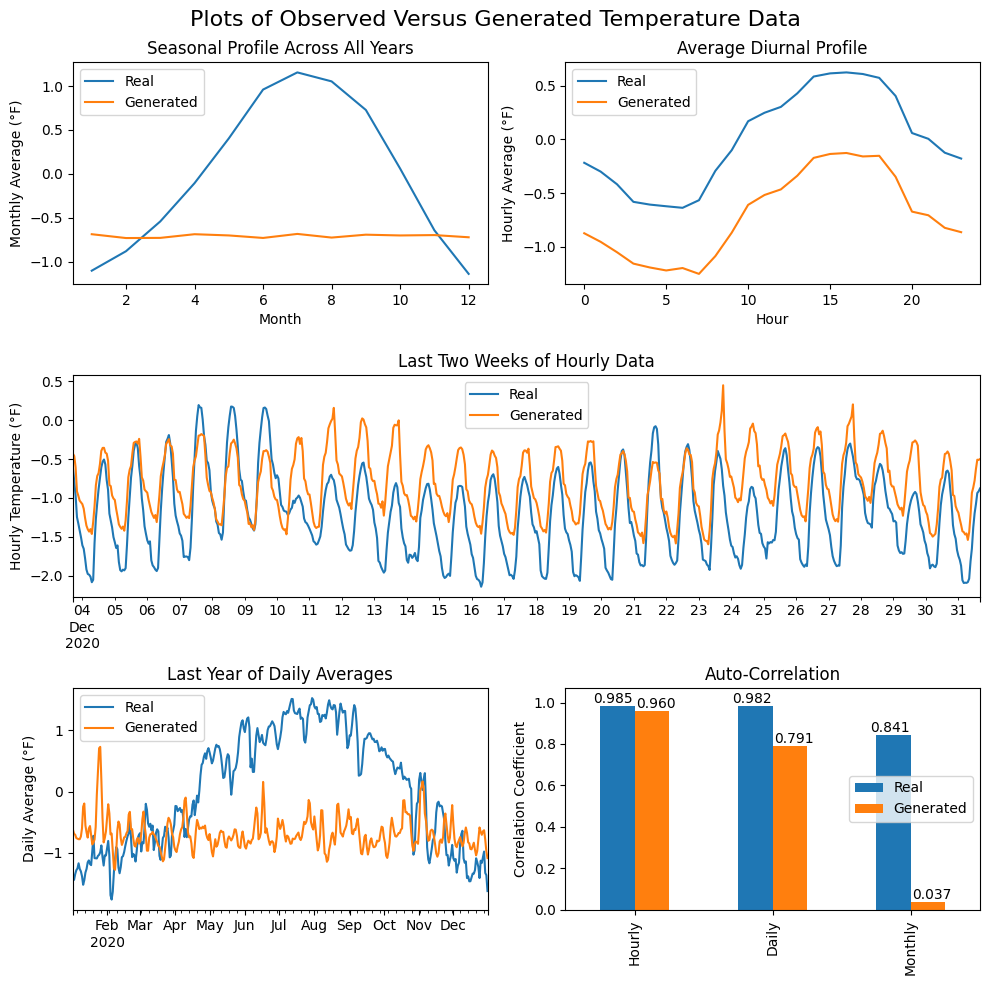

In [11]:
# Create a GridSpec with 3 rows and 2 columns
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3, 2)

# Top row: 2 plots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Middle row: 1 wide plot spanning both columns
ax3 = fig.add_subplot(gs[1, :])

# Bottom row: 2 plots
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Plot seasonal profile
df.groupby(df.index.month).mean().plot(ax=ax1)
ax1.set_title('Seasonal Profile Across All Years')
ax1.set_ylabel('Monthly Average (°F)')
ax1.set_xlabel('Month')

# Plot diurnal profile
df.groupby(df.index.hour).mean().plot(ax=ax2)
ax2.set_title('Average Diurnal Profile')
ax2.set_ylabel('Hourly Average (°F)')
ax2.set_xlabel('Hour')

# Plot last two weeks of hourly data
df.iloc[-24*28:].plot(ax=ax3, title='Last Two Weeks of Hourly Data')
# set y-axis label
ax3.set_ylabel('Hourly Temperature (°F)')

# Plot the last year of daily averages
df.resample('D').mean().iloc[-365:].plot(ax=ax4, title='Last Year of Daily Averages')
# set y-axis label
ax4.set_ylabel('Daily Average (°F)')

# Plot correlation
# ax5.bar(corr_df.index, corr_df)
corr_df.plot(kind='bar', ax=ax5)
# set y-axis label
ax5.set_ylabel('Correlation Coefficient')
ax5.set_title('Auto-Correlation')
for i, value in enumerate(corr_df['Real']):
    ax5.text(i-0.01, value, f'{value:.3f}', ha='right', va='bottom')
for i, value in enumerate(corr_df['Generated']):
    ax5.text(i+0.01, value, f'{value:.3f}', ha='left', va='bottom')

plt.ylim(bottom=0, top=1.07)

fig.suptitle('Plots of Observed Versus Generated Temperature Data', fontsize=16)

plt.tight_layout()
plt.savefig('results/seasonal_diurnal_correlation_with_gen.png', dpi=300)
plt.show()
